# Projective transformations

Please install the packages numpy and matplotlib.  
Run a CMD (Click on Windows Symbol and search for CMD).  
Enter: `pip install --user numpy matplotlib`

## Preparations

Make matplotlib and numpy available ...

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Print floating point numbers with a reduced precision:

In [2]:
np.set_printoptions(precision=2)

Use the following 2-by-12 matrix to draw a simple house:

In [3]:
X = np.array([[-6, -6, -7, 0, 7, 6,  6, -3, -3,  0,  0, -6],
              [-7,  2,  1, 8, 1, 2, -7, -7, -2, -2, -7, -7]], dtype=np.float)

no_rows, no_cols = X.shape[0], X.shape[1]
print("X is:"); print(X)

X is:
[[-6. -6. -7.  0.  7.  6.  6. -3. -3.  0.  0. -6.]
 [-7.  2.  1.  8.  1.  2. -7. -7. -2. -2. -7. -7.]]


Make points homogeneous:

In [4]:
one_row_shape = (1, no_cols) # only one row with ones!
one_row = np.ones(one_row_shape, dtype=np.float)
X_h = np.concatenate((X, one_row), axis=0) # axis 0 means downwards
print("X_h is:"); print(X_h)

X_h is:
[[-6. -6. -7.  0.  7.  6.  6. -3. -3.  0.  0. -6.]
 [-7.  2.  1.  8.  1.  2. -7. -7. -2. -2. -7. -7.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


## Projectivity 1

Build up and apply the homography:

In [5]:
H_1 = np.array([[   1, 0, 0],
                [   0, 1, 0],
                [0.04, 0, 1]], dtype=float)
X_1 = H_1.dot(X_h) # apply homography

Make points inhomogeneous again:

In [6]:
X_1i = X_1[0:2, :] / X_1[2, :] # make inhom. for plotting
print("X_1i is:"); print(X_1i)

X_1i is:
[[-7.89 -7.89 -9.72  0.    5.47  4.84  4.84 -3.41 -3.41  0.    0.   -7.89]
 [-9.21  2.63  1.39  8.    0.78  1.61 -5.65 -7.95 -2.27 -2.   -7.   -9.21]]


Plot house and scaled house:

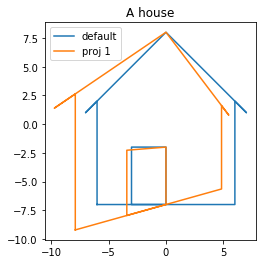

In [7]:
window_name = "A house"
plt.title(window_name)
plt.plot(X[0, :], X[1, :], label="default") # house
plt.plot(X_1i[0, :], X_1i[1, :], label="proj 1") # projectivity
plt.gca().set_aspect('equal', adjustable='box') # equal scale for x and y axis
plt.legend(loc="upper left")
plt.show(window_name)

## Projectivity 2

Build up homography and apply homography:

In [8]:
H_2 = np.array([[   1,    0, 0],
                [   0,    1, 0],
                [0.04, 0.04, 1]], dtype=float)
X_2 = H_2.dot(X_h) # apply homography

Make points inhomogeneous again:

In [9]:
X_2i = X_2[0:2, :] / X_2[2, :]
print("X_2i is:"); print(X_2i)

X_2i is:
[[-12.5   -7.14  -9.21   0.     5.3    4.55   6.25  -5.    -3.75   0.
    0.   -12.5 ]
 [-14.58   2.38   1.32   6.06   0.76   1.52  -7.29 -11.67  -2.5   -2.17
   -9.72 -14.58]]


Plot house and rotated house:

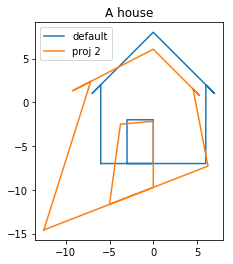

In [10]:
plt.title(window_name)
plt.plot(X[0, :], X[1, :], label="default") # house
plt.plot(X_2i[0, :], X_2i[1, :], label="proj 2") # rotated house
plt.gca().set_aspect('equal', adjustable='box') # equal scale for x and y axis
plt.legend(loc="upper left")
plt.show(window_name)